https://github.com/shap/shap/blob/master/notebooks/tabular_examples/linear_models/Explaining%20a%20model%20that%20uses%20standardized%20features.ipynb

## Explain a model that uses standardized features

Standardizing features is a common preprocessing step for many ML pipelines. When explaining a model that uses standardized features it is often desirable to get explanations using the original input features (not their standardized versions). This notebook shows how to do that using the property that any univariate transformation applied to a model's inputs does not effect the Shapley values for the model (note that multi-variate transformations like PCA decompositions do change the Shapley values so this trick does not apply there).

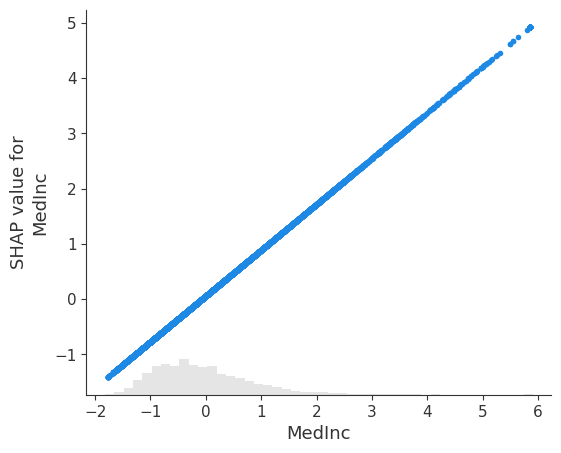

In [1]:
import sklearn
import shap
from numpy.testing import assert_allclose

# get standardized data
X, y = shap.datasets.california()
scaler = sklearn.preprocessing.StandardScaler().set_output(transform="pandas")
X_std = scaler.fit_transform(X)

# train the linear model
model = sklearn.linear_model.LinearRegression().fit(X_std, y)

# explain the model's predictions using SHAP
explainer = shap.LinearExplainer(model, X_std)
shap_values = explainer(X_std)

# visualize dependence on the first feature
shap.plots.scatter(shap_values[:, 0])




In [2]:
# We test the additivity of the SHAP values against the model's predictions.

predicted_value = model.predict(X_std)

# ✅ SHAP additivity check
assert_allclose(
    shap_values.base_values + shap_values.values.sum(axis=1),
    predicted_value,
    rtol=1e-5
)

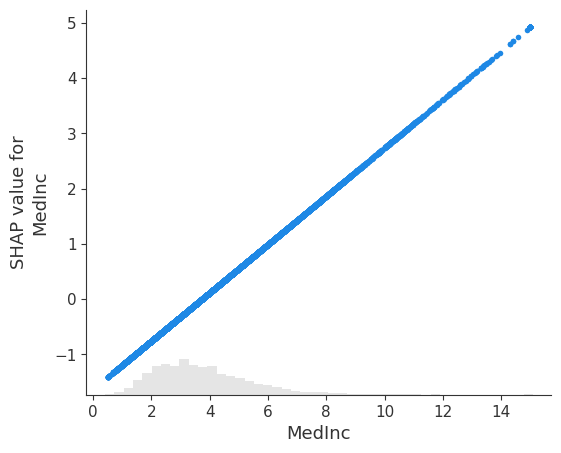

In [3]:
# we convert back to the original data
# (note we can do this because X_std is a set of univariate transformations of X)
shap_values.data = X.values

# visualize the model's dependence on the first feature again, now in the new original feature space
shap.plots.scatter(shap_values[:, 0])